In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
len(train_data), len(test_data)

(8982, 2246)

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [9]:
#reverse_word_index

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[10]

3

### Preparing the data 


In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

* To vectorize the labels, there are two possibilities: 
*  we could just cast the label list as an integer tensor, or 
*  we could use a "one-hot" encoding. One-hot encoding is a widely used format for categorical data, also called "categorical 

encoding". For a more detailed explanation of one-hot encoding, you can refer to Chapter 6, Section 1. In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector with a 1 in the place of the label index, e.g.:

In [14]:
def to_one_hot(labels, dimension=46): # Since there are 46 classes 
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### Building our Network

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Validation our approach 

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 2.6412 - accuracy: 0.5124 - val_loss: 1.7928 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.4588 - accuracy: 0.6961 - val_loss: 1.3473 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.0651 - accuracy: 0.7689 - val_loss: 1.1678 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8406 - accuracy: 0.8202 - val_loss: 1.0599 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6695 - accuracy: 0.8594 - val_loss: 0.9952 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5355 - accuracy: 0.8900 - val_loss: 1.0547 - val_accuracy: 0.7620
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4385 - accuracy: 0.9104 - val_loss: 0.9346 - val_accuracy: 0.8090
Epoch 8/20
16

In [26]:
history_dict = history.history

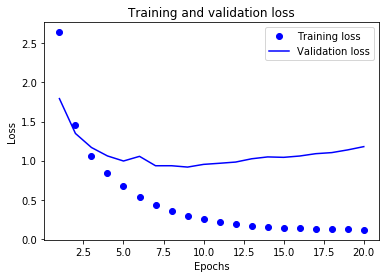

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

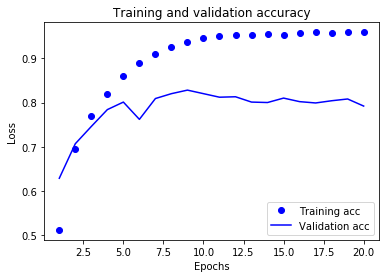

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Since the model starts overfitting after 12th epoch

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=6,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/6
16/16 [==============================] - 1s 33ms/step - loss: 2.6058 - accuracy: 0.5308 - val_loss: 1.7212 - val_accuracy: 0.6420
Epoch 2/6
16/16 [==============================] - 0s 28ms/step - loss: 1.4071 - accuracy: 0.7060 - val_loss: 1.3039 - val_accuracy: 0.7140
Epoch 3/6
16/16 [==============================] - 0s 28ms/step - loss: 1.0470 - accuracy: 0.7735 - val_loss: 1.1412 - val_accuracy: 0.7420
Epoch 4/6
16/16 [==============================] - 0s 28ms/step - loss: 0.8307 - accuracy: 0.8178 - val_loss: 1.0259 - val_accuracy: 0.7770
Epoch 5/6
16/16 [==============================] - 0s 28ms/step - loss: 0.6663 - accuracy: 0.8564 - val_loss: 0.9706 - val_accuracy: 0.7970
Epoch 6/6
71/71 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.7778


In [35]:
import copy

test_labels_copy = copy.copy(test_labels) # Creating another copu
np.random.shuffle(test_labels_copy) # Shuffling thetest labels copy
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

#### Generating predictions on new data 

In [36]:
predictions = model.predict(x_test)

predictions[0].shape

(46,)

In [37]:
np.argmax(predictions[0]) # highest probability class is 

4

#### Using Tensor Labels and the loss


In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 17ms/step - loss: 2.7321 - accuracy: 0.3951 - val_loss: 2.1193 - val_accuracy: 0.4090
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7078 - accuracy: 0.5887 - val_loss: 1.5485 - val_accuracy: 0.6390
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3263 - accuracy: 0.6729 - val_loss: 1.4225 - val_accuracy: 0.6570
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 1.1744 - accuracy: 0.6952 - val_loss: 1.3813 - val_accuracy: 0.6600
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0708 - accuracy: 0.7043 - val_loss: 1.3699 - val_accuracy: 0.6640
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9843 - accuracy: 0.7171 - val_loss: 1.3740 - val_accuracy: 0.6630
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9072 - accuracy: 0.7269 - val_loss: 1.3847 - val_accuracy: 0.6660
Epoch 8/20
63